In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


questions:


1) what are the most important Frameworks, Libraries, and Tools data scientists use?

2) How is it easiest to break into the field?

3) Are data scientists happier with their job than others?

4) do data scientists who contribute to open source have a higher salary than others? 

In [2]:
cd gdrive/My\ Drive/data_science

/content/gdrive/My Drive/data_science


In [3]:
import pandas as pd
import re as _re
import seaborn as _sns
import numpy as _np
from scipy.stats import levene
from scipy.stats import ttest_ind

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

In [0]:
# create a flag for being a data scientist
df['is_data_scientist'] = df["DevType"].str.contains("Data scientist or machine learning specialist")

# 1) How is it easiest to break into the field?

## Method:




In [0]:
# Take a look at subset of data consisting of individuals adding `Data scientist or machine learning specialist` as `DevType` 

ds_df = df.query("is_data_scientist == True").copy()

In [6]:
print("How many individuals say they are `Data scientist or machine learning specialist`?\n")

print(
    f"Out of {len(df)} respondents, {len(ds_df)} say they are `Data scientist "
    f"or machine learning specialist`.\n"
    f"This is a share of {len(ds_df)/len(df):.1%}"
    )

How many individuals say they are `Data scientist or machine learning specialist`?

Out of 88883 respondents, 6460 say they are `Data scientist or machine learning specialist`.
This is a share of 7.3%


In [0]:
def get_shares(df, col, delimiter=';'):
  list_col = 'list_' + col
  df[list_col] = df[col].str.split(delimiter)
  
  sample_cnt = len(df)
  tmp_df = df[list_col].apply(pd.Series).stack()
  share_df = tmp_df.value_counts().to_frame().rename(
      columns={0: 'cnt'}
  )
  share_df["share"] = share_df["cnt"] / sample_cnt
  share_df["metric"] = col
  share_df = share_df.reset_index().rename(columns={'index': 'description'})
  return share_df

In [17]:
other_dev_types = get_shares(df=ds_df, col="DevType", delimiter=';').iloc[1:]
other_dev_types.head()

,description,cnt,share,metric
1,"Developer, back-end",3075,0.476006,DevType
2,"Developer, full-stack",2445,0.378483,DevType
3,Data or business analyst,2079,0.321827,DevType
4,Academic researcher,1874,0.290093,DevType
5,"Engineer, data",1872,0.289783,DevType


In [9]:
other_dev_types.head()

,description,cnt,share
1,"Developer, back-end",3075,0.476006
2,"Developer, full-stack",2445,0.378483
3,Data or business analyst,2079,0.321827
4,Academic researcher,1874,0.290093
5,"Engineer, data",1872,0.289783


In [0]:
def plot_shares(x, y, color):
  plot_args = {
    'x': x,
    'y': y,
    'color': color
  }
  ax = _sns.barplot(**plot_args)
  ax.set_xticklabels(labels=plot_args['x'], rotation=90);
  vals = ax.get_yticks()
  ax.set_yticklabels(['{:,.0%}'.format(y_val) for y_val in vals]);

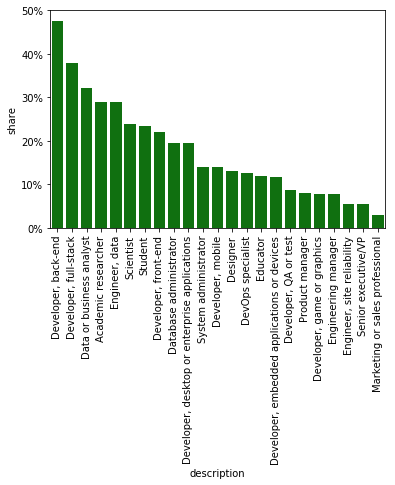

In [11]:
plot_shares(x=other_dev_types['description'], y=other_dev_types["share"], color='g')

# Are data scientists happier with their job than others?

In [159]:
ds_df['JobSat'].unique()

array(['Slightly satisfied', 'Slightly dissatisfied', nan,
       'Very satisfied', 'Neither satisfied nor dissatisfied',
       'Very dissatisfied'], dtype=object)

In [160]:
cat survey_results_schema.csv | grep ramework

WebFrameWorkedWith,"Which of the following web frameworks have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the framework and want to continue to do so, please check both boxes in that row.)"
WebFrameDesireNextYear,"Which of the following web frameworks have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the framework and want to continue to do so, please check both boxes in that row.)"
MiscTechWorkedWith,"Which of the following other frameworks, libraries, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the technology and want to continue to do so, please check both boxes in that row.)"
MiscTechDesireNextYear,"Which of the following other frameworks, libraries, and tools have you done extensive developme

In [0]:
job_satisfaction_mapping = {
    'Very dissatisfied': 0,
    'Slightly dissatisfied': 1,
    'Neither satisfied nor dissatisfied': 2,    
    'Slightly satisfied': 3, 
    'Very satisfied': 4,
 }

In [0]:
df['JobSatNumeric'] = df['JobSat'].map(job_satisfaction_mapping, na_action='ignore')

In [163]:
t_test_stats = df.groupby('is_data_scientist')['JobSatNumeric'].agg(['mean', 'std'])
t_test_stats

,mean,std
is_data_scientist,,
False,2.679709,1.248633
True,2.769388,1.244634


In [233]:
ref = df.query('is_data_scientist == False')['JobSatNumeric'].dropna()
test = df.query('is_data_scientist == True')['JobSatNumeric'].dropna()

# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
levene_statistic, levene_pvalue = levene(ref, test)
# test not significant, therefor equal variances can be assumed
print(f"levene statistic: {levene_statistic}, levene p-value: {levene_pvalue}")

statistic, two_sided_pvalue = ttest_ind(a=ref, b=test, axis=0, equal_var=True)
# half the p-value as t-test is performing a two-sided test and we have a one-sided hypothesis
one_sided_pvalue = two_sided_pvalue / 2

print(f"The test is significant on a confidence level of 95%, the p-value is: {one_sided_pvalue:.7f}")

levene statistic: 1.0668981200409065, levene p-value: 0.30165072324487513
The test is significant on a confidence level of 95%, the p-value is: 0.0000002


# What are the most important Frameworks, Libraries, and Tools data scientists use?

In [0]:
# # TODO figure out how to use this
# def split_to_list(df: pd.DataFrame, col: str, delimiter: str =";") -> pd.DataFrame:
#   """
#   Split string by delimiter and add additional column with list of elements.
#   """
#   new_col = "individual_" + col
#   df[new_col] = df[col].str.split(";")
#   print(df[new_col].head())
#   return df

In [0]:
# def split_to_list(row):
#   """
#   Split string by delimiter and add additional column with list of elements.
#   """
#   if row["WebFrameWorkedWith"] is np.nan:
#     new_row = row["WebFrameWorkedWith"].str.split(";")
#   else:
#     new_row = []
#   return new_row

In [0]:
metrics = [
  "LanguageWorkedWith",
  "DatabaseWorkedWith",
  "PlatformWorkedWith",
  "WebFrameWorkedWith",
  "MiscTechWorkedWith",
]

In [0]:
mydf = pd.DataFrame()

for __, metric in enumerate(metrics):
  mydf = mydf.append(get_shares(df=ds_df, col=metric, delimiter=';'), ignore_index=True)

In [121]:
mydf

,description,cnt,share,metric
0,Python,5125,0.793344,LanguageWorkedWith
1,SQL,3775,0.584365,LanguageWorkedWith
2,JavaScript,3319,0.513777,LanguageWorkedWith
3,HTML/CSS,3258,0.504334,LanguageWorkedWith
4,Bash/Shell/PowerShell,2874,0.444892,LanguageWorkedWith
5,Java,2453,0.379721,LanguageWorkedWith
6,C++,2066,0.319814,LanguageWorkedWith
7,R,1975,0.305728,LanguageWorkedWith
8,C,1674,0.259133,LanguageWorkedWith
9,C#,1463,0.226471,LanguageWorkedWith


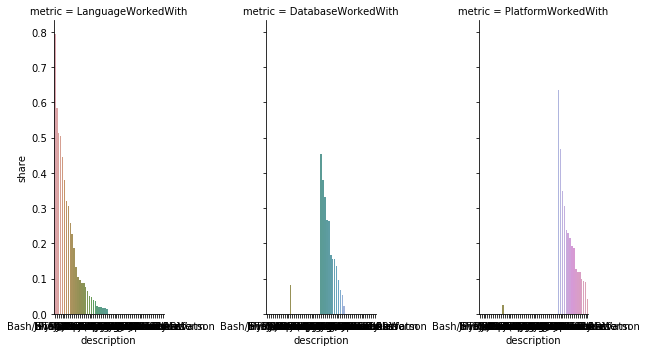

In [114]:
# g = sns.catplot(x="description", y="share", col="metric",
#                 data=mydf, saturation=.5,
#                 kind="bar", ci=None, aspect=.6)

In [0]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.gridspec as gridspec

# db = mydf.query("metric == 'DatabaseWorkedWith'")
# platform = mydf.query("metric == 'PlatformWorkedWith'")
# language = mydf.query("metric == 'LanguageWorkedWith'")
# plt.close('all')
# gs1 = gridspec.GridSpec(3, 1)
# ax1 = fig.add_subplot(gs1[0])
# ax2 = fig.add_subplot(gs1[1])
# ax3 = fig.add_subplot(gs1[2])

# sns.barplot(x=db['description'], y=db["share"], color='g', ax=ax1)
# sns.barplot(x=platform['description'], y=platform["share"], color='b', ax=ax2)
# sns.barplot(x=language['description'], y=language["share"], color='y', ax=ax3)

# ax1.set_xticklabels(labels=db['description'], rotation=90);
# ax2.set_xticklabels(labels=platform['description'], rotation=90);
# ax3.set_xticklabels(labels=language['description'], rotation=90);

# ax1.set_yticklabels(['{:,.0%}'.format(y_val) for y_val in ax1.get_yticks()]);
# ax2.set_yticklabels(['{:,.0%}'.format(y_val) for y_val in ax2.get_yticks()]);
# ax3.set_yticklabels(['{:,.0%}'.format(y_val) for y_val in ax3.get_yticks()]);
# gs1.tight_layout(fig)

In [29]:
%timeit
mydf = pd.DataFrame()

for __, metric in enumerate(metrics):
  mydf = mydf.append(get_shares(df=ds_df, col=metric, delimiter=';'))

,description,cnt,share,metric
0,Python,5125,0.793344,LanguageWorkedWith
1,SQL,3775,0.584365,LanguageWorkedWith
2,JavaScript,3319,0.513777,LanguageWorkedWith
3,HTML/CSS,3258,0.504334,LanguageWorkedWith
4,Bash/Shell/PowerShell,2874,0.444892,LanguageWorkedWith
5,Java,2453,0.379721,LanguageWorkedWith
6,C++,2066,0.319814,LanguageWorkedWith
7,R,1975,0.305728,LanguageWorkedWith
8,C,1674,0.259133,LanguageWorkedWith
9,C#,1463,0.226471,LanguageWorkedWith


In [26]:
ds_misc_tools = get_shares(df=ds_df, col="MiscTechWorkedWith", delimiter=';')
ds_misc_tools.head()

,cnt,share
Pandas,2984,0.461920
TensorFlow,2399,0.371362
Node.js,1750,0.270898
.NET,1101,0.170433
Apache Spark,1074,0.166254


In [27]:
ds_languages = get_shares(df=ds_df, col="LanguageWorkedWith", delimiter=';') 
ds_languages.head()

,cnt,share
Python,5125,0.793344
SQL,3775,0.584365
JavaScript,3319,0.513777
HTML/CSS,3258,0.504334
Bash/Shell/PowerShell,2874,0.444892


In [29]:
ds_db = get_shares(df=ds_df, col="DatabaseWorkedWith", delimiter=';') 
ds_db.head()

,cnt,share
MySQL,2926,0.452941
PostgreSQL,2455,0.380031
SQLite,2150,0.332817
Microsoft SQL Server,1712,0.265015
MongoDB,1711,0.264861


In [30]:
ds_platform = get_shares(df=ds_df, col="PlatformWorkedWith", delimiter=';')
ds_platform.head()

,cnt,share
Linux,4100,0.634675
Windows,3016,0.466873
Docker,2251,0.348452
AWS,1971,0.305108
MacOS,1533,0.237307


In [0]:
df_web_frameworks = get_shares(df=ds_df, col="WebFrameWorkedWith", delimiter=';') 
df_web_frameworks;

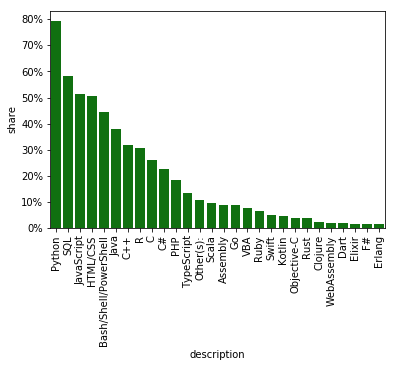

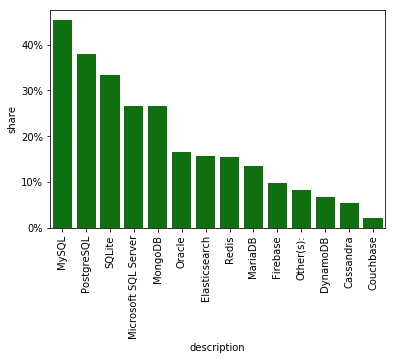

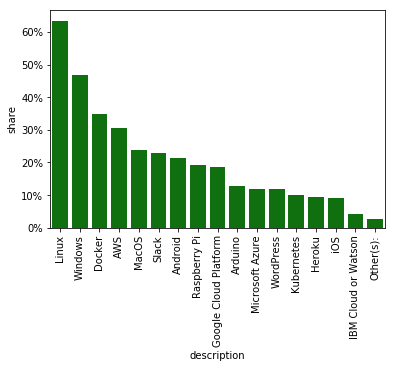

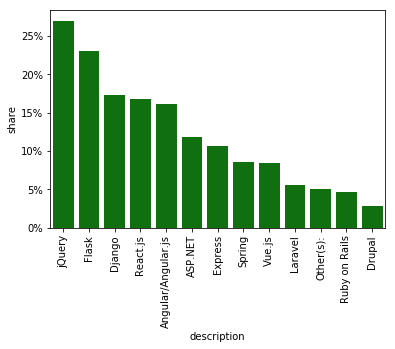

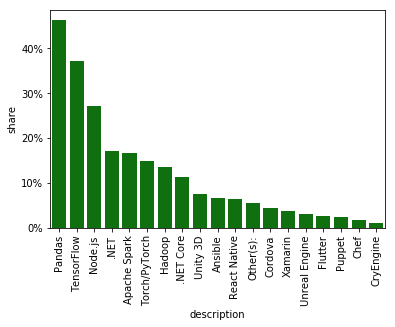

In [125]:
# TODO: add a grid

for metric in metrics:
  plot_shares(x=mydf.query("metric == @metric")["description"], y=mydf.query("metric == @metric")["share"], color='g')
  plt.show()

In [116]:
plot_shares(x=ds_misc_tools.index, y=ds_misc_tools.share, color='g')

NameError: ignored

#  do data scientist have more healthy habits than other programmers?

In [177]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,is_data_scientist,JobSatNumeric
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,NaN,NaN
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,False,NaN
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never,Home,Average,N

In [199]:
cat survey_results_schema.csv | grep Source

OpenSourcer,How often do you contribute to open source?
OpenSource,How do you feel about the quality of open source software (OSS)?


In [0]:
def calculate_t_test(ref, test, two_sided=False):
  ref = ref.dropna()
  test = test.dropna()

  # The Levene test tests the null hypothesis that all input samples are 
  # from populations with equal variances.
  levene_statistic, levene_pvalue = levene(ref, test)
  # test not significant, therefor equal variances can be assumed
  print(f"levene statistic: {levene_statistic}, levene p-value: {levene_pvalue}")
  if levene_pvalue >= 0.05:
    statistic, two_sided_pvalue = ttest_ind(a=ref, b=test, axis=0, equal_var=True)
    # half the p-value as t-test is performing a two-sided test and we have a one-sided hypothesis
    if two_sided == True:
      one_sided_pvalue = two_sided_pvalue / 2
      if one_sided_pvalue > 0.05:
        evaluation = ' not'
      else:
        print(f"The test is {evaluation} significant on a confidence level of 95%, the p-value is: {one_sided_pvalue:.7f}")
    else:
      if two_sided_pvalue > 0.05:
        evaluation = ' not'

      print(f"The test is {evaluation} significant on a confidence level of 95%, the p-value is: {two_sided_pvalue:.7f}")
  else:
    print("Consider calculating Welch t-test")


In [219]:
calculate_t_test(
    ref=df.query('is_data_scientist == False')['ConvertedComp'], 
    test=df.query('is_data_scientist == True')['ConvertedComp']
)

levene statistic: 10.86134287223919, levene p-value: 0.0009825448799474236
Consider calculating Welch t-test


In [200]:
ds_df["OpenSourcer"].

array(['Never', 'Once a month or more often',
       'Less than once a month but more than once per year',
       'Less than once per year'], dtype=object)

In [0]:
open_source_mapping = {
    'Never': False, 
    'Less than once per year': np.nan,
    'Less than once a month but more than once per year': np.nan,    
    'Once a month or more often': True,
}

In [0]:
ds_df["is_regular_open_sourcer"] = ds_df["OpenSourcer"].map(open_source_mapping)

In [227]:
ds_df["is_regular_open_sourcer"].head()

5     False
9      True
11    False
32      NaN
61      NaN
Name: is_regular_open_sourcer, dtype: object

In [228]:
calculate_t_test(
    ref=ds_df.query('is_regular_open_sourcer == False')['ConvertedComp'], 
    test=ds_df.query('is_regular_open_sourcer == True')['ConvertedComp']
)

levene statistic: 0.6159679942613298, levene p-value: 0.4326514275269554
The test is  not significant on a confidence level of 95%, the p-value is: 0.4417454


In [231]:
ds_df.groupby(["is_regular_open_sourcer"])["ConvertedComp"].mean()

is_regular_open_sourcer
False    142364.315442
True     154889.438312
Name: ConvertedComp, dtype: float64